In [1]:
import matplotlib.pyplot as plt 
from scipy.fft import fft, ifft
import numpy as np
import scipy
import math

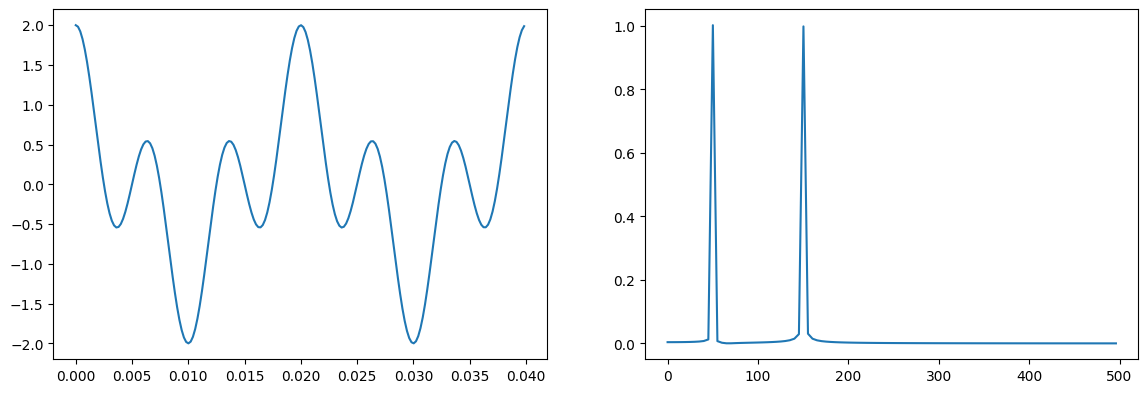

In [2]:
N = 1000
f1 = 50
f2 = 150
fmax= 500

T = 1/fmax
x = np.linspace(0, N*T/10, N)
y = np.cos(2*np.pi*f1*x)+np.cos(2*np.pi*f2*x)
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(x[:N//5], y[:N//5])

xf = np.linspace(0, 10*fmax/2, N//2)
yf = fft(y)
plt.subplot(222)
plt.plot(xf[:N//10], 2/N*abs(yf[:N//10]))

plt.show()

 1) На вход передатчика подается некоторый сигнал во времени. В качестве сигнала
  возможно рассмотреть сигнал прямоугольных периодических импульсов.

 Реализовать свертку сигнала с некоторым ядром во временной области.

 В качестве ядра свертки использовать (а) y=A•exp(-x^2), (б) любую линейную функцию.

 Замечание: Для реализации свертки можно использовать готовую встроенную
 функцию numpy: convolve(signal,kernel)

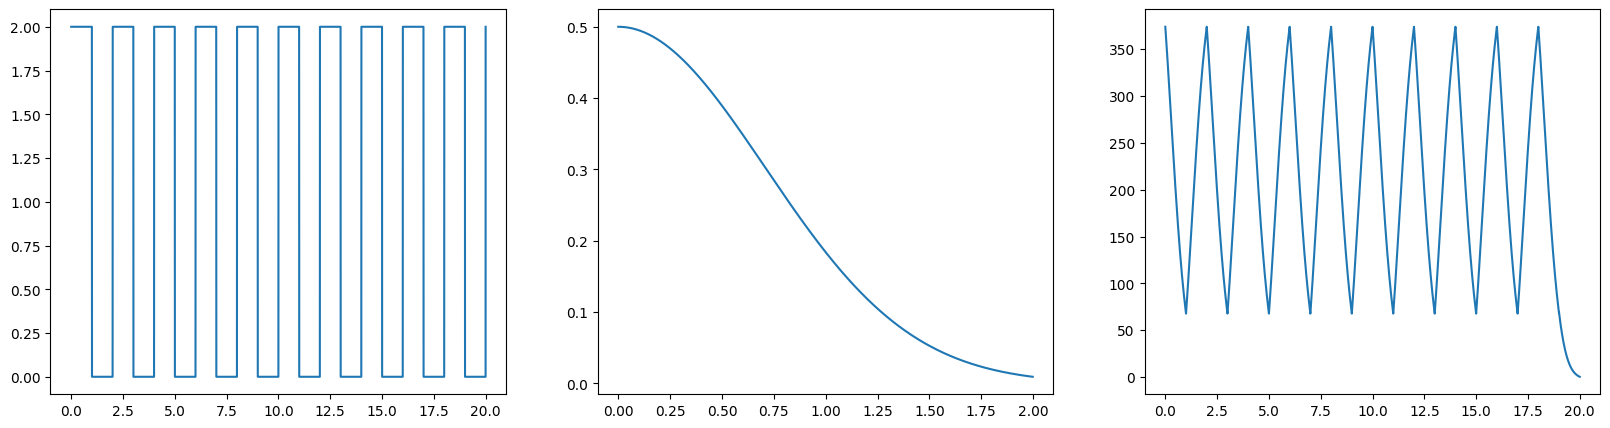

In [3]:
N = 10000
fmax= 50
T = 1/fmax
A = 0.5
t = np.linspace(0, N*T/10, N)
function = np.zeros_like(t)
function[t % 2 < 1] = 2
kernel = A*np.exp(-(t[:N//10])**2)
#kernel = 1000*t[:N//30] + 10
res = np.convolve(function, kernel, 'same')
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(t, function)
plt.subplot(132)
plt.plot(t[:N//10], kernel)
plt.subplot(133)
plt.plot(t, res)
plt.show()

2) Чтобы разобраться в алгоритме свертки двух сигналов – реализуйте свой
алгоритм, осуществляющий свертку сигнала с произвольным ядром.

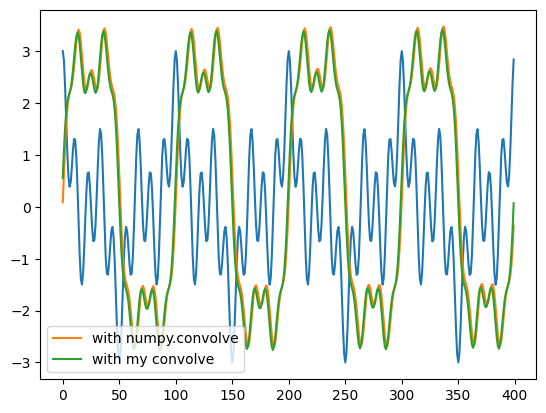

In [85]:
N = 10000
fmax= 50
T = 1/fmax
A = 0.5
t = np.linspace(0, N*T/100, N)
cos50 = np.cos(2*np.pi*50*t)
cos150 = np.cos(2*np.pi*150*t)
cos450 = np.cos(2*np.pi*450*t)
function = cos50 + cos150 + cos450
kernel = A*np.exp(-(t[:N//10]-1)**2)
res1 = np.convolve(function, kernel, 'same')

def convolve(signal, kernel):
    signal_len = len(signal)
    kernel_len = len(kernel)
    result = [0] * (signal_len + kernel_len - 1)
    for i in range(signal_len + kernel_len - 1):
        for j in range(kernel_len):
            if i - j >= 0 and i - j < signal_len:
                result[i] += signal[i - j] * kernel[j]
    return result

res2 = convolve(function, kernel)
plt.plot(function[:400])
plt.plot(res1[:400], label=('with numpy.convolve'))
plt.plot(res2[:400], label=('with my convolve'))
plt.legend()
plt.show()

3) Для любого выбранного Вами ядра свертки убедиться, что свертка во временной
области эквивалентна умножению в частотной области (теорема о свертке).

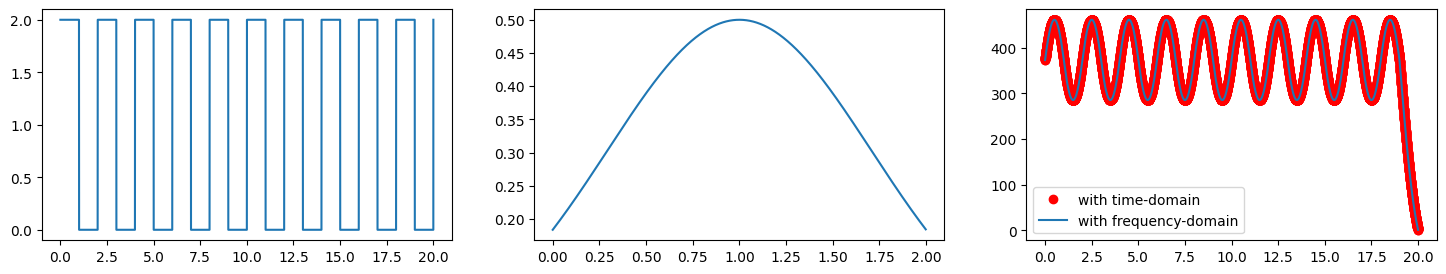

In [74]:
N = 10000
fmax= 50
T = 1/fmax
A = 0.5
t = np.linspace(0, N*T/10, N)
function = np.zeros_like(t)
function[t % 2 < 1] = 2
kernel = A*np.exp(-(t[:N//10]-1)**2)
res1 = np.convolve(function, kernel, 'same')
res2 = scipy.signal.fftconvolve(function, kernel, 'same')
plt.figure(figsize=(18,3))
plt.subplot(131)
plt.plot(t, function)
plt.subplot(132)
plt.plot(t[:N//10], kernel)
plt.subplot(133)
plt.plot(t, res1, 'ro', label=('with time-domain'))
plt.plot(t, res2, label=('with frequency-domain'))
plt.legend()
plt.show()

4, 5) Разобраться в реализации свертки с ядром Гаусса для реализации
сглаживающего фильтра во временной и частотной области.

In [6]:
srate = 1000 # Hz
time = np.arange(0,3,1/srate)
n    = len(time)
p    = 15 # poles for random interpolation
## create signal
# noise level, measured in standart deviations
noiseamp = 5
# amplitude modelator and noise level
ampl = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
noise = noiseamp * np.random.randn(n)
signal1 = ampl + noise# subtract mean to eliminate DC
signal1 = signal1 - np.mean(signal1)
## create the Gaussian kernel
# full-width half-maximum: the key Gaussian perameter
fwhm = 25 # in ms
# normalized time vector in ms
k = 100
gtime = 1000*np.arange(-k,k)/srate
# create Gaussian window
gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )
# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)

In [7]:
import copy
import scipy
### filter as time-domain convolution
# initialize filtered signal vector
filtersigG = copy.deepcopy(signal1)
# implement the running mean filter
for i in range(k+1, n-k-1):
    # each point is the weighted average of k surrounding points
    filtersigG[i] = np.sum( signal1[i-k:i+k]*gauswin )
## now repeat in the frequency domain
# compute N's
nConv = n + 2*k+1 - 1
# FFTs
dataX = scipy.fftpack.fft(signal1,nConv)
gausX = scipy.fftpack.fft(gauswin, nConv)
# IFFT
convres = np.real( scipy.fftpack.ifft( dataX*gausX))
# cut wings
convres = convres[k:-k]
# frequencies vector
hz = np.linspace(0, srate, nConv)

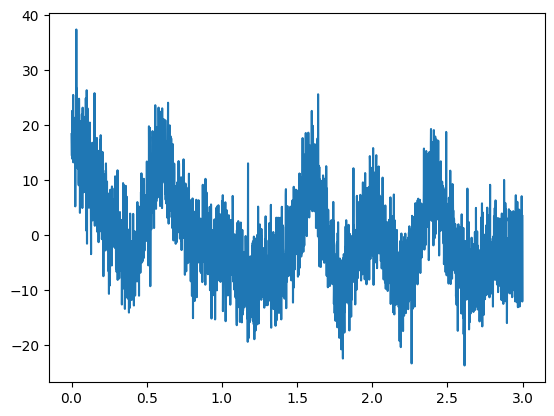

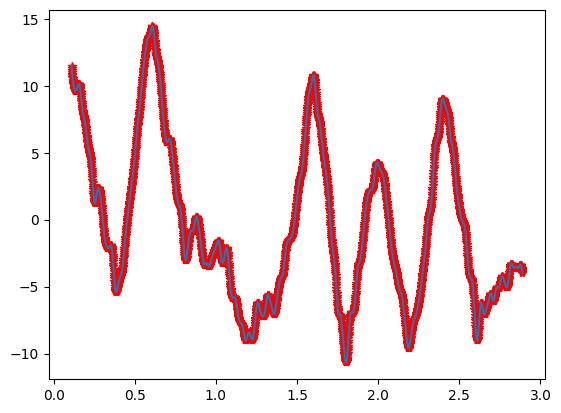

In [129]:

plt.plot(time, signal1)
plt.show()
plt.plot(time[110:-110], filtersigG[110:-110], 'r*')
plt.plot(time[110:-110], convres[110:-110])

### Реализовать полосовой фильтр, используя окно Планка.

[0, 7.412745630437854e-35, 1.4473289826371616e-17, 8.472754732810985e-12, 6.545436847751826e-09, 3.6743399056723115e-07, 5.834037667460317e-06, 4.578363399110243e-05, 0.00023078591046497564, 0.0008607603946563418, 0.0025831859128179506, 0.006568799361162904, 0.014626255402635499, 0.029175570226545176, 0.0530721351519358, 0.08934352727853673, 0.1409168646037017, 0.2103912084496358, 0.29987907888636367, 0.4109191372362848, 0.5444504163184618, 0.7008340950387005, 0.8799084748880069, 1.0810643672045817, 1.3033303631853645, 1.5454598509714286, 1.806013890000579, 2.0834360236865495, 2.37611675177892, 2.682446679662915, 3.000858327358295, 3.329857249260365, 3.668043531785929, 4.0141249502693475, 4.3669231285137275, 4.725373999698856, 5.088523754390927, 5.455521310913534, 5.825608178423249, 6.198106420018621, 6.57240527287651, 6.947946851278627, 7.324211249956075, 7.700701280947867, 8.076927017499848, 8.452390283256756, 8.826569213853604, 9.198903030863296, 9.56877720498836, 9.935509246602539,

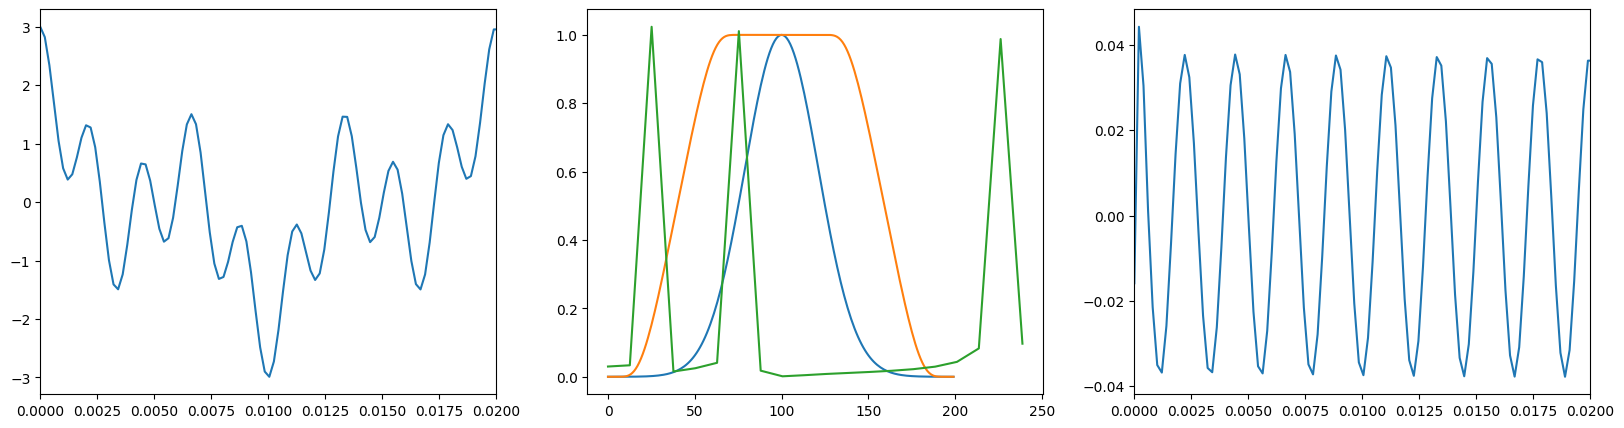

In [125]:
eta = 0.4
def plank_window(n):
    window = [0] * n
    for i in range(n):
        if i == n - 1 or i == 0:
            window[i] = 0
            continue
        Za = eta*(n-1)*(1/i+1/(i-eta*(n-1)))
        Zb = eta*(n-1)*(1/(n-1-i) + 1/((1-eta)*(n-1) - i))
        if eta*(n-1) <= i <= (1 - eta)*(n-1):
            window[i] = 1
        if 0 < i < eta*(n-1):
            window[i] = 1/(np.exp(Za) + 1)
        if (1 - eta)*(n-1) < i < n-1:
            window[i] = 1/(np.exp(Zb) + 1)       
    return window

window_size = 200 # размер окна
t = np.linspace(0, window_size, 5000)
fwhm = 50 # in ms
# normalized time vector in ms
k = 100
gtime = 1000*np.arange(-k,k)/srate
# create Gaussian window
gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )
kernel = plank_window(window_size)
signal = [1, 2, 3, 4, 5]
result = convolve(signal, kernel)
print(result)
    

N = 200
fmax= 500
T = 1/fmax
t = np.linspace(0, N*T/10, N)
planck_taper_kernel = plank_window(window_size)

cos50 = np.cos(2*np.pi*50*t)
cos150 = np.cos(2*np.pi*150*t)
cos450 = np.cos(2*np.pi*450*t)
function = cos50 + cos150 + cos450
yf = fft(function)
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.plot(t, function)
plt.xlim(0,1/50)
xf = np.linspace(0, 10*fmax/2, N)
plt.subplot(132)
plt.plot(gauswin)
plt.plot(planck_taper_kernel)
plt.plot(xf[:N//10], 2/N*abs(yf[:N//10]))
for i in range(len(yf)):    
    yf[i] = (yf[i]) * (planck_taper_kernel[i])
final = np.real(ifft(yf))
plt.subplot(133)
plt.plot(t, final)
plt.xlim(0,1/50)
plt.show()

7) Сравнить результат фильтрации зашумленного сигнала при использовании ядра
Гаусса и окна Планка. Результат работы программы представлен на Рис. 7.

C:\Users\honor\AppData\Local\Temp\ipykernel_17004\1759983746.py:13: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian_kernel = scipy.signal.gaussian(kernel_size, std/2)


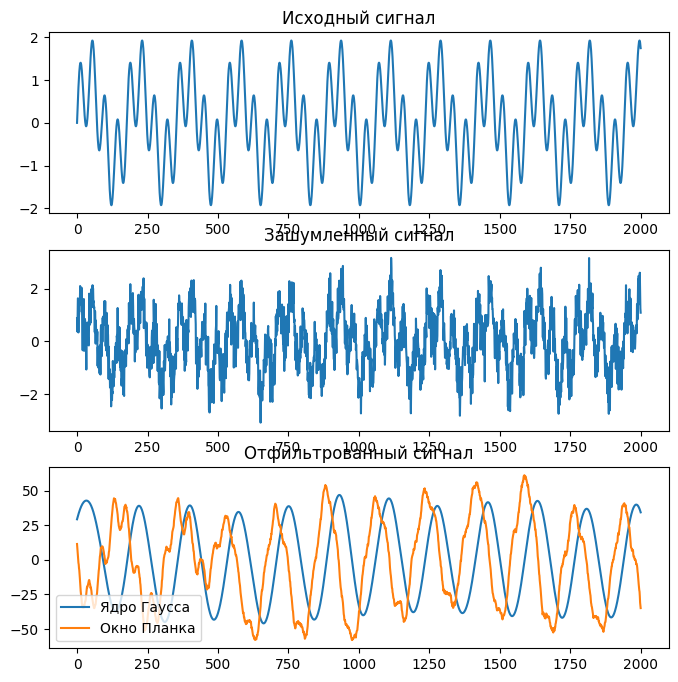

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Создание зашумленного сигнала
np.random.seed(0)
signal = np.sin(2 * np.pi * 1000 * np.arange(0, 1, 1/44100)) + np.sin(2 * np.pi * 250 * np.arange(0, 1, 1/44100))
noise = 0.5 * np.random.normal(size=len(signal))
noisy_signal = signal + noise

# Создание ядра Гаусса и окна Планка
kernel_size = 1024
std = 50
gaussian_kernel = scipy.signal.gaussian(kernel_size, std/2)
plank_kernel = np.ones(kernel_size)
plank_kernel[int(kernel_size/2):int(kernel_size/2)+int(std*3) + int(std*3)] = scipy.signal.windows.hann(int(std*6))

# Фильтрация сигнала с помощью ядра Гаусса и окна Планка
gaussian_filtered = np.convolve(noisy_signal, gaussian_kernel, mode='same')
plank_filtered = np.convolve(noisy_signal, plank_kernel, mode='same')

# Отображение результатов фильтрации
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))
ax1.plot(signal[:2000])
ax1.set_title('Исходный сигнал')
ax2.plot(noisy_signal[:2000])
ax2.set_title('Зашумленный сигнал')
ax3.plot(gaussian_filtered[:2000])
ax3.plot(plank_filtered[:2000])
ax3.legend(['Ядро Гаусса', 'Окно Планка'])
ax3.set_title('Отфильтрованный сигнал')
plt.show()